In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# ref.https://www.youtube.com/watch?v=EItlUEPCIzM

In [2]:
# Read in data
df = pd.read_csv("customer_example.csv")
df.head(2)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28


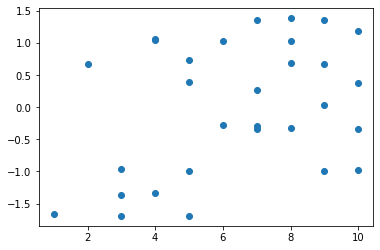

In [3]:
plt.scatter(df['Satisfaction'], df['Loyalty'])

In [4]:
# Standardisation using z-score scaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=['Satisfaction', 'Loyalty'])
df.head(2)

,Satisfaction,Loyalty
0,-0.931381,-1.331811
1,-0.155230,-0.281171


In [5]:
# Build k-means model
kmeans = KMeans(n_clusters=3, random_state=0)
y_predict = kmeans.fit_predict(df)

df['cluster'] = y_predict
df.head(2)

,Satisfaction,Loyalty,cluster
0,-0.931381,-1.331811,2
1,-0.155230,-0.281171,1


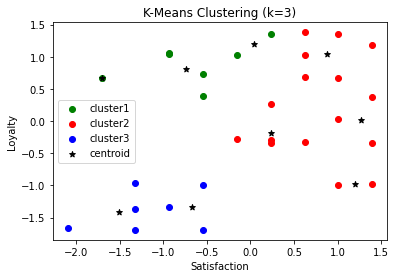

In [16]:
# Plot
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


plt.scatter(df1.Satisfaction, df1.Loyalty, color='green', label='cluster1')
plt.scatter(df2.Satisfaction, df2.Loyalty, color='red', label='cluster2')
plt.scatter(df3.Satisfaction, df3.Loyalty, color='blue', label='cluster3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.title("K-Means Clustering (k=3)")
plt.legend()

In [11]:
# Evaluation
k_range = range(1,10)
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Satisfaction','Loyalty']])
    sse.append(kmeans.inertia_)
sse

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.571285077136385,
 5.423830011052963,
 4.434309636536097,
 3.7282834443589534]

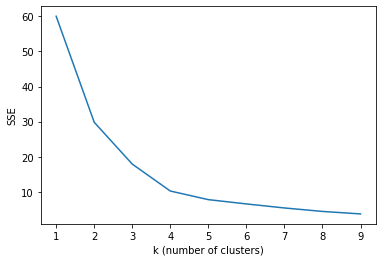

In [13]:
plt.xlabel("k (number of clusters)")
plt.ylabel("SSE")
plt.plot(k_range, sse)